In [134]:
# 4. Sobel Filtering

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "pictures/CT.png"

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

(h, w) = image.shape

output1 = np.zeros(image.shape)
output2 = np.zeros(image.shape)

Sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])


for i in range(h - 2):
    for j in range(w - 2):
        Gx = abs(np.sum(image[i:i+3, j:j+3] * Sx))
        Gy = abs(np.sum(image[i:i+3, j:j+3] * Sy))
        
        output1[i+1][j+1] = Gx if Gx <= 255 else 255
        output2[i+1][j+1] = Gy if Gy <= 255 else 255

output1 = np.uint8(output1)
output2 = np.uint8(output2)

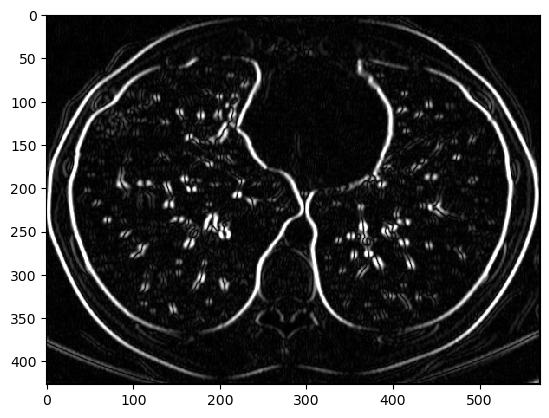

In [135]:
plt.imshow(output1, 'gray')

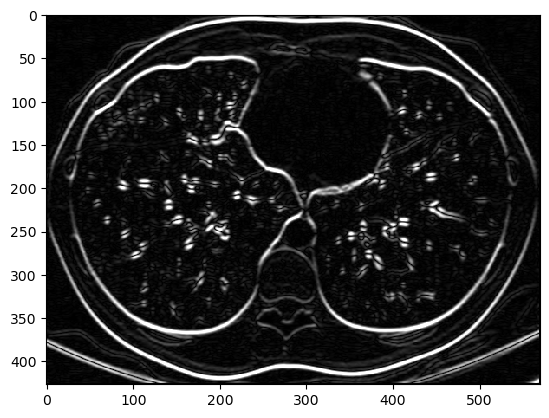

In [136]:
plt.imshow(output2, 'gray')

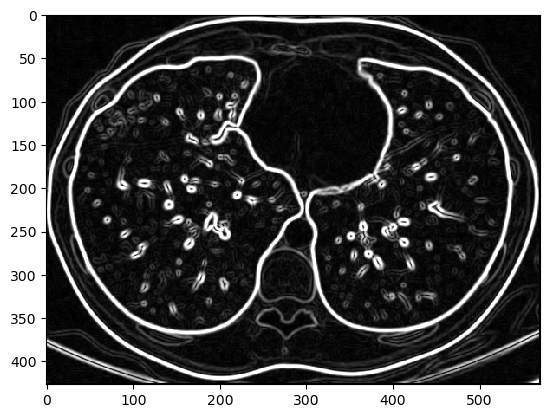

In [138]:
output3 = np.zeros(image.shape)

for i in range(h):
    for j in range(w):
        n1 = pow(float(output1[i][j]), 2)
        n2 = pow(float(output2[i][j]), 2)
        I = np.sqrt(n1 + n2)
        I = I if I <= 255 else 255
        output3[i][j] = np.uint8(I)

plt.imshow(output3, cmap='gray', vmin=0, vmax=255)